In [1]:
import cv2 #as cv
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path, PurePosixPath


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = Path.cwd()
assert path.parts[-1] == "Notebooks"


## Cambio de directorio

In [4]:
new_path = path.parent
os.chdir(new_path)

In [28]:
0.85**3

0.6141249999999999

## Carga datos

In [5]:
data = "data/"
imagenes = [new_path / data / imag for imag in (new_path / data).glob("**/*")]
imagenes

[PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/6.fits'),
 PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/7.fits'),
 PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/bla.png'),
 PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/happiness_not_enough.png'),
 PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/hst_08278_01_wfpc2_f555w_wf_drz.fits'),
 PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/LReduced.fits'),
 PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/media_files_STRIPE82-0007-3.8793636368877404--0.8015460191427091-200_R.fits.fz')]

In [6]:
img = cv2.imread(str(imagenes[4]), cv2.IMREAD_COLOR)
img_rgb = img[...,::-1]

TypeError: 'NoneType' object is not subscriptable

In [ ]:
img_rgb_cv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

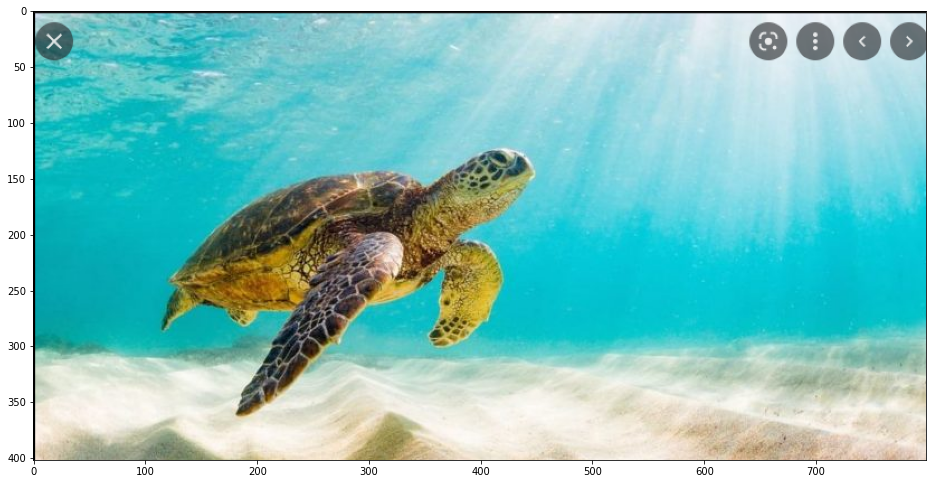

In [31]:
plt.figure(figsize = (16,9))
plt.imshow(img_rgb_cv)

In [7]:
with fits.open(imagenes[4]) as hdul:
    try:
        image = hdul["SCI"].data
        header = hdul["SCI"].header
        height = image.shape[0]
        width = image.shape[1]
    except KeyError:
        image = hdul[1].data
        header = hdul[1].header
        height = image.shape[0]
        width = image.shape[1]
    
## Verifying amount of zeros (mask)
zeros_amount = [(vect==0).sum() for vect in image]
porcentual_zeros = np.sum(zeros_amount) / (height*width)
print(f"La cantidad porcentual de ceros en la imagen es de = {int(porcentual_zeros*100)}%")

La cantidad porcentual de ceros en la imagen es de = 47%


In [10]:
image/image.max()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

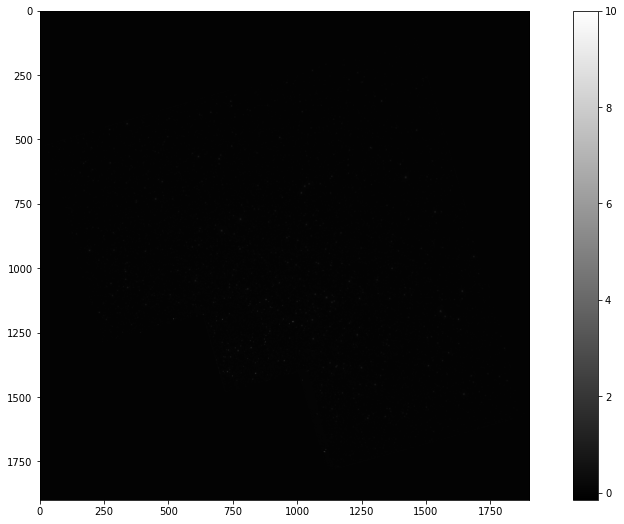

In [13]:
plt.figure(figsize = (16,9))
plt.imshow((image*10)/image.max(), cmap='gray')
plt.colorbar()

In [48]:
np.uint8([-50, 0, 300, 100]), 3891%256

(array([206,   0,  44, 100], dtype=uint8), 51)

In [9]:
from src.imagen.load_image import LFI

In [11]:
lfi = LFI()


In [12]:
lfi.load_image(imagenes[3])

In [13]:
lfi.path_image

PosixPath('/home/juanorion/Repositorios/reduccion_imagenes_astronomicas/data/hst_08278_01_wfpc2_f555w_wf_drz.fits')

In [14]:
lfi.visualize_image()

In [138]:
from astropy.wcs import WCS
w = WCS(header)
sky = w.pixel_to_world(311,1110)


In [146]:
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [148]:
cv.EVENT_FLAG_ALTKEY?

Type:        int
String form: 32
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


dtype('>f4')

In [30]:
cv.COLOR_GRAY2BGR

Docstring:
colorChange(src, mask[, dst[, red_mul[, green_mul[, blue_mul]]]]) -> dst
.   @brief Given an original color image, two differently colored versions of this image can be mixed
.   seamlessly.
.   
.   @param src Input 8-bit 3-channel image.
.   @param mask Input 8-bit 1 or 3-channel image.
.   @param dst Output image with the same size and type as src .
.   @param red_mul R-channel multiply factor.
.   @param green_mul G-channel multiply factor.
.   @param blue_mul B-channel multiply factor.
.   
.   Multiplication factor is between .5 to 2.5.
Type:      builtin_function_or_method


In [30]:
a = img[0]
b = img[1]
c = img[2]
d = img[3]
w = np.dot(a,b)

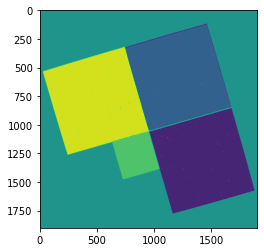

In [34]:
[matrix f]

In [ ]:
#cv.imshow("imagen", img)
#key = cv.waitKey(0)
#if key == ord("q"):
#    cv.destroyAllWindows()

In [ ]:
plt.imshow(img.data)


In [ ]:
print(f"{imagenes[0].split("/")[-1]}")

In [ ]:
imagenes[0].split("/")[-1]

## Cargando imagenes

In [17]:
(19/2)**7


6983372.9609375

1